In [ ]:
#Arundarasi Rajendran
#16edc6705b41f000

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [2]:
df = pd.concat(map(pd.read_csv,['2022-12-09-enriched.csv','2022-07-04-enriched.csv','2022-06-27-enriched.csv','2022-06-09-enriched.csv','2022-06-08-enriched.csv']))
df.reset_index(drop=True, inplace=True)
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# count of rows and number of columns
df.shape

(3984, 16)

In [4]:
# summary of the data
df.describe(include = 'all')

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
count,3984,3984,3979,3984,3984,3954,3984,3984,77,3984.000000,3106,2484.000000,3090,2484,2484,2484
unique,860,140,374,690,64,825,10,79,67,NaN,486,NaN,81,3,2,4
top,CVE-2020-1631,microsoft,Windows,Microsoft Win32k Privilege Escalation Vulnerab...,2021-11-03,"A vulnerability in Cisco Small Business RV160,...",Apply updates per vendor instructions.,2022-05-03,https://www.gigabyte.com/Support/Security/1801,NaN,2018-03-28,NaN,NVD-CWE-noinfo,NETWORK,LOW,HIGH
freq,5,1174,405,80,1435,25,3716,870,4,NaN,60,NaN,492,1822,2258,1382
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.417922,NaN,8.412440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.401496,NaN,1.302686,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,3.100000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,7.800000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,8.800000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,9.800000,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3984 non-null   object 
 1   vendor_project      3984 non-null   object 
 2   product             3979 non-null   object 
 3   vulnerability_name  3984 non-null   object 
 4   date_added          3984 non-null   object 
 5   short_description   3954 non-null   object 
 6   required_action     3984 non-null   object 
 7   due_date            3984 non-null   object 
 8   notes               77 non-null     object 
 9   grp                 3984 non-null   int64  
 10  pub_date            3106 non-null   object 
 11  cvss                2484 non-null   float64
 12  cwe                 3090 non-null   object 
 13  vector              2484 non-null   object 
 14  complexity          2484 non-null   object 
 15  severity            2484 non-null   object 
dtypes: flo

In [6]:
# number of null entries per column
df.isnull().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
short_description       30
required_action          0
due_date                 0
notes                 3907
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

In [7]:
# Dropping the "notes" column
df.drop('notes', axis=1, inplace=True)

In [8]:
# Removing missing values
df1_cleaned = df.dropna()

In [9]:
df1_cleaned.isnull().sum()

cve_id                0
vendor_project        0
product               0
vulnerability_name    0
date_added            0
short_description     0
required_action       0
due_date              0
grp                   0
pub_date              0
cvss                  0
cwe                   0
vector                0
complexity            0
severity              0
dtype: int64

In [10]:
df1_cleaned.shape

(2453, 15)

In [11]:
# Drop duplicated rows based on 'cve_id'
df_cleaned = df1_cleaned.drop_duplicates(subset='cve_id')
# Reset the index of the cleaned dataframe
df_cleaned.reset_index(drop=True, inplace=True)

In [12]:
df_cleaned.shape

(622, 15)

In [13]:
df_cleaned.dtypes

cve_id                 object
vendor_project         object
product                object
vulnerability_name     object
date_added             object
short_description      object
required_action        object
due_date               object
grp                     int64
pub_date               object
cvss                  float64
cwe                    object
vector                 object
complexity             object
severity               object
dtype: object

In [14]:
# Convert date columns to datetime dtype
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])
df_cleaned['due_date'] = pd.to_datetime(df_cleaned['due_date'])
df_cleaned['pub_date'] = pd.to_datetime(df_cleaned['pub_date'])

# Create new columns for day and month with new names
df_cleaned['date_added_dayofweek'] = df_cleaned['date_added'].dt.strftime('%a')
df_cleaned['due_date_dayofweek'] = df_cleaned['due_date'].dt.strftime('%a')
df_cleaned['pub_date_dayofweek'] = df_cleaned['pub_date'].dt.strftime('%a')

df_cleaned['date_added_month'] = df_cleaned['date_added'].dt.strftime('%b')
df_cleaned['due_date_month'] = df_cleaned['due_date'].dt.strftime('%b')
df_cleaned['pub_date_month'] = df_cleaned['pub_date'].dt.strftime('%b')

<ipython-input-14-0d430cbb9ea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])
<ipython-input-14-0d430cbb9ea6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['due_date'] = pd.to_datetime(df_cleaned['due_date'])
<ipython-input-14-0d430cbb9ea6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cve_id                622 non-null    object        
 1   vendor_project        622 non-null    object        
 2   product               622 non-null    object        
 3   vulnerability_name    622 non-null    object        
 4   date_added            622 non-null    datetime64[ns]
 5   short_description     622 non-null    object        
 6   required_action       622 non-null    object        
 7   due_date              622 non-null    datetime64[ns]
 8   grp                   622 non-null    int64         
 9   pub_date              622 non-null    datetime64[ns]
 10  cvss                  622 non-null    float64       
 11  cwe                   622 non-null    object        
 12  vector                622 non-null    object        
 13  complexity          

In [16]:
df_cleaned.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,...,cwe,vector,complexity,severity,date_added_dayofweek,due_date_dayofweek,pub_date_dayofweek,date_added_month,due_date_month,pub_date_month
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,...,CWE-78,NETWORK,LOW,CRITICAL,Wed,Wed,Tue,Nov,Nov,Feb
1,CVE-2020-9818,apple,iOS Mail,Apple iOS Mail OOB Vulnerability,2021-11-03,Processing a maliciously crafted mail message ...,Apply updates per vendor instructions.,2022-05-03,1,2020-06-09,...,CWE-787,NETWORK,LOW,HIGH,Wed,Tue,Tue,Nov,May,Jun
2,CVE-2021-30657,apple,macOS,Apple macOS Policy Subsystem Gatekeeper Bypass,2021-11-03,A malicious application may bypass Gatekeeper ...,Apply updates per vendor instructions.,2021-11-17,1,2021-09-08,...,NVD-CWE-noinfo,LOCAL,LOW,MEDIUM,Wed,Wed,Wed,Nov,Nov,Sep
3,CVE-2021-22986,f5,BIG-IP,F5 iControl REST unauthenticated Remote Code E...,2021-11-03,The iControl REST interface has an unauthentic...,Apply updates per vendor instructions.,2021-11-17,1,2021-03-31,...,CWE-918,NETWORK,LOW,CRITICAL,Wed,Wed,Wed,Nov,Nov,Mar
4,CVE-2021-30563,google,Chrome,Google Chrome Browser V8 Arbitrary Code Execution,2021-11-03,Type Confusion in V8 in Google Chrome prior to...,Apply updates per vendor instructions.,2021-11-17,1,2021-08-03,...,CWE-843,NETWORK,LOW,HIGH,Wed,Wed,Tue,Nov,Nov,Aug


In [17]:
df_cleaned.shape

(622, 21)

In [18]:
df_cleaned.shape

(622, 21)

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cve_id                622 non-null    object        
 1   vendor_project        622 non-null    object        
 2   product               622 non-null    object        
 3   vulnerability_name    622 non-null    object        
 4   date_added            622 non-null    datetime64[ns]
 5   short_description     622 non-null    object        
 6   required_action       622 non-null    object        
 7   due_date              622 non-null    datetime64[ns]
 8   grp                   622 non-null    int64         
 9   pub_date              622 non-null    datetime64[ns]
 10  cvss                  622 non-null    float64       
 11  cwe                   622 non-null    object        
 12  vector                622 non-null    object        
 13  complexity          

In [20]:
df_cleaned.describe(include = 'all')

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,...,cwe,vector,complexity,severity,date_added_dayofweek,due_date_dayofweek,pub_date_dayofweek,date_added_month,due_date_month,pub_date_month
count,622,622,622,622,622,622,622,622,622.000000,622,...,622,622,622,622,622,622,622,622,622,622
unique,622,124,307,517,40,587,6,57,NaN,360,...,75,3,2,4,5,6,7,9,11,12
top,CVE-2017-12232,microsoft,Windows,Microsoft Win32k Privilege Escalation Vulnerab...,2021-11-03 00:00:00,"A vulnerability in Cisco Small Business RV160,...",Apply updates per vendor instructions.,2022-05-03 00:00:00,NaN,2018-03-28 00:00:00,...,NVD-CWE-noinfo,NETWORK,LOW,HIGH,Wed,Tue,Wed,Nov,May,Mar
freq,1,171,63,12,276,5,594,166,NaN,15,...,97,455,565,345,319,219,168,280,198,88
first,NaN,NaN,NaN,NaN,2021-11-03 00:00:00,NaN,NaN,2020-01-29 00:00:00,NaN,2014-04-07 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2022-07-01 00:00:00,NaN,NaN,2022-09-07 00:00:00,NaN,2022-06-02 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.745981,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.195790,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_cleaned.dtypes

cve_id                          object
vendor_project                  object
product                         object
vulnerability_name              object
date_added              datetime64[ns]
short_description               object
required_action                 object
due_date                datetime64[ns]
grp                              int64
pub_date                datetime64[ns]
cvss                           float64
cwe                             object
vector                          object
complexity                      object
severity                        object
date_added_dayofweek            object
due_date_dayofweek              object
pub_date_dayofweek              object
date_added_month                object
due_date_month                  object
pub_date_month                  object
dtype: object

In [22]:
df_cleaned.duplicated().any()

False

In [23]:
df_cleaned.isna().sum()

cve_id                  0
vendor_project          0
product                 0
vulnerability_name      0
date_added              0
short_description       0
required_action         0
due_date                0
grp                     0
pub_date                0
cvss                    0
cwe                     0
vector                  0
complexity              0
severity                0
date_added_dayofweek    0
due_date_dayofweek      0
pub_date_dayofweek      0
date_added_month        0
due_date_month          0
pub_date_month          0
dtype: int64

In [24]:
#unique values of product column
df_cleaned['product'].nunique()

307

In [25]:
df_cleaned['product'].unique()

array(['FTA', 'iOS Mail', 'macOS', 'BIG-IP', 'Chrome',
       'Microsoft Defender', 'Windows', 'TeamViewer Desktop',
       'Snapdragon Auto, Snapdragon Compute, Snapdragon Connectivity, Snapdragon Consumer IOT, Snapdragon Industrial IOT, Snapdragon Mobile, Snapdragon Voice & Music, Snapdragon Wearables',
       'Drupal core', 'Office', 'Frontend', 'Acrobat and Reader',
       'ColdFusion', 'Flash Player',
       'Cameras and Network Video Recorder (NVR)', 'Struts',
       'HTTP Server', 'Shiro', 'Solr', 'iOS and iPadOS', 'FaceTime',
       'iOS', 'iOS and macOS', 'Safari', 'iOS, macOS, and iPadOS',
       'Buffalo WSR-2533DHPL2 and WSR-2533DHP3 firmware',
       'Arm Trusted Firmware', 'Mali Graphics Processing Unit (GPU)',
       'Confluence', 'Confluence Server', 'Crowd and Crowd Data Center',
       'Atlassian Confluence Server', 'BillQuick Web Suite',
       'Adaptive Security Appliance (ASA) and Firepower Threat Defense (FTD)',
       'HyperFlex HX', 'IOS and IOS XE', 'IOS XR', '

In [26]:
df_cleaned['cvss'].nunique()

32

In [27]:
df_cleaned['cvss'].unique()

array([ 9.8,  8.8,  5.5,  7.8,  7. ,  8.1,  7.5, 10. ,  4.3,  6.1,  6.5,
        9.6,  9.1,  6.3,  8.4,  7.2,  9. ,  5.3,  6.8,  6.6,  4.9,  9.9,
        7.1,  5.4,  7.4,  5.9,  8. ,  8.6,  4.7,  6.4,  8.2,  3.1])

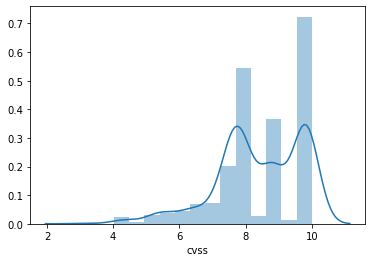

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_cleaned['cvss'])
plt.show()

In [29]:
df_cleaned['cwe'].nunique()

75

In [30]:
df_cleaned['cwe'].unique()

array(['CWE-78', 'CWE-787', 'NVD-CWE-noinfo', 'CWE-918', 'CWE-843',
       'CWE-131', 'CWE-521', 'CWE-20', 'CWE-434', 'CWE-290', 'CWE-89',
       'CWE-416', 'CWE-502', 'CWE-22', 'CWE-284', 'CWE-74', 'CWE-917',
       'CWE-190', 'CWE-665', 'CWE-362,CWE-269', 'CWE-79', 'CWE-120',
       'CWE-863', 'CWE-134', 'CWE-400', 'CWE-200', 'CWE-611', 'CWE-862',
       'CWE-326', 'CWE-732', 'CWE-119', 'CWE-798', 'CWE-269',
       'CWE-22,CWE-829', 'CWE-306', 'CWE-287', 'CWE-787,CWE-843',
       'CWE-119,CWE-20', 'CWE-22,CWE-94', 'CWE-522', 'CWE-94', 'CWE-264',
       'CWE-347', 'CWE-787,CWE-190', 'CWE-77', 'CWE-787,CWE-416',
       'CWE-330', 'CWE-295', 'CWE-362,CWE-416', 'NVD-CWE-Other',
       'CWE-755', 'CWE-77,CWE-787', 'CWE-552', 'CWE-668', 'CWE-425',
       'CWE-94,CWE-306', 'CWE-494', 'CWE-287,CWE-697', 'CWE-59',
       'CWE-312', 'CWE-285', 'CWE-640,CWE-287', 'CWE-404', 'CWE-125',
       'CWE-772', 'CWE-362', 'CWE-352', 'CWE-78,CWE-755', 'CWE-693',
       'CWE-704', 'CWE-193', 'CWE-415', 'C

In [31]:
df_cleaned['vector'].nunique()

3

In [32]:
df_cleaned['vector'].unique()

array(['NETWORK', 'LOCAL', 'ADJACENT_NETWORK'], dtype=object)

In [33]:
df_cleaned['complexity'].nunique()

2

In [34]:
df_cleaned['complexity'].unique()

array(['LOW', 'HIGH'], dtype=object)

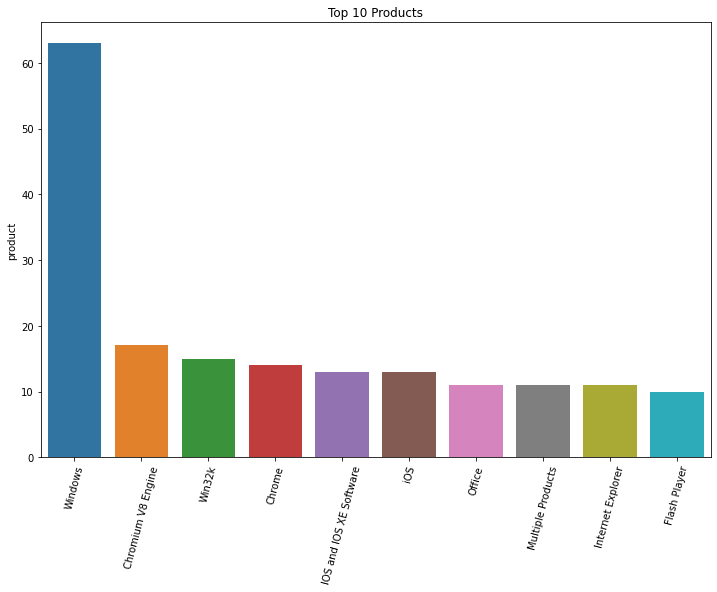

In [35]:
p = df_cleaned['product'].value_counts()
p10 = p[:10]
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title('Top 10 Products')
sns.barplot(p10.index, p10)

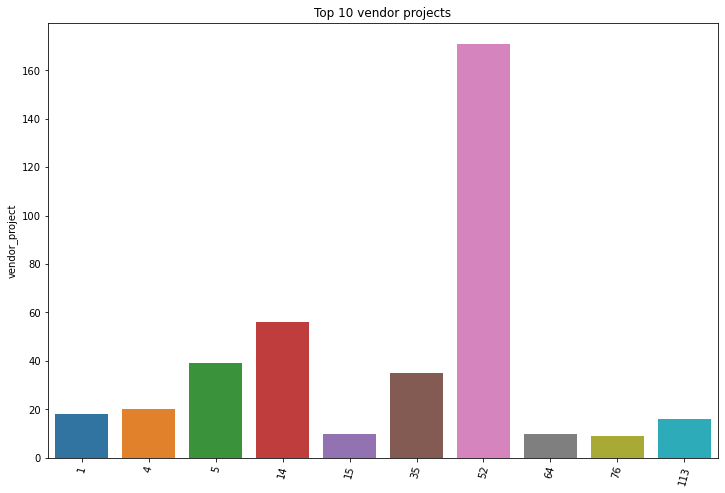

In [66]:
v = df_cleaned['vendor_project'].value_counts()
v10=v[:10]
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title("Top 10 vendor projects")
sns.barplot(v10.index,v10)

In [37]:
df_cleaned.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,...,cwe,vector,complexity,severity,date_added_dayofweek,due_date_dayofweek,pub_date_dayofweek,date_added_month,due_date_month,pub_date_month
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,...,CWE-78,NETWORK,LOW,CRITICAL,Wed,Wed,Tue,Nov,Nov,Feb
1,CVE-2020-9818,apple,iOS Mail,Apple iOS Mail OOB Vulnerability,2021-11-03,Processing a maliciously crafted mail message ...,Apply updates per vendor instructions.,2022-05-03,1,2020-06-09,...,CWE-787,NETWORK,LOW,HIGH,Wed,Tue,Tue,Nov,May,Jun
2,CVE-2021-30657,apple,macOS,Apple macOS Policy Subsystem Gatekeeper Bypass,2021-11-03,A malicious application may bypass Gatekeeper ...,Apply updates per vendor instructions.,2021-11-17,1,2021-09-08,...,NVD-CWE-noinfo,LOCAL,LOW,MEDIUM,Wed,Wed,Wed,Nov,Nov,Sep
3,CVE-2021-22986,f5,BIG-IP,F5 iControl REST unauthenticated Remote Code E...,2021-11-03,The iControl REST interface has an unauthentic...,Apply updates per vendor instructions.,2021-11-17,1,2021-03-31,...,CWE-918,NETWORK,LOW,CRITICAL,Wed,Wed,Wed,Nov,Nov,Mar
4,CVE-2021-30563,google,Chrome,Google Chrome Browser V8 Arbitrary Code Execution,2021-11-03,Type Confusion in V8 in Google Chrome prior to...,Apply updates per vendor instructions.,2021-11-17,1,2021-08-03,...,CWE-843,NETWORK,LOW,HIGH,Wed,Wed,Tue,Nov,Nov,Aug


In [38]:
df_cleaned['dd_year'] = df_cleaned['due_date'].dt.year
df_cleaned['pd_year'] = df_cleaned['pub_date'].dt.year
df_cleaned['da_year'] = df_cleaned['date_added'].dt.year

<ipython-input-38-b6a7bf3b90ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dd_year'] = df_cleaned['due_date'].dt.year
<ipython-input-38-b6a7bf3b90ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pd_year'] = df_cleaned['pub_date'].dt.year
<ipython-input-38-b6a7bf3b90ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Text(0, 0.5, 'count')

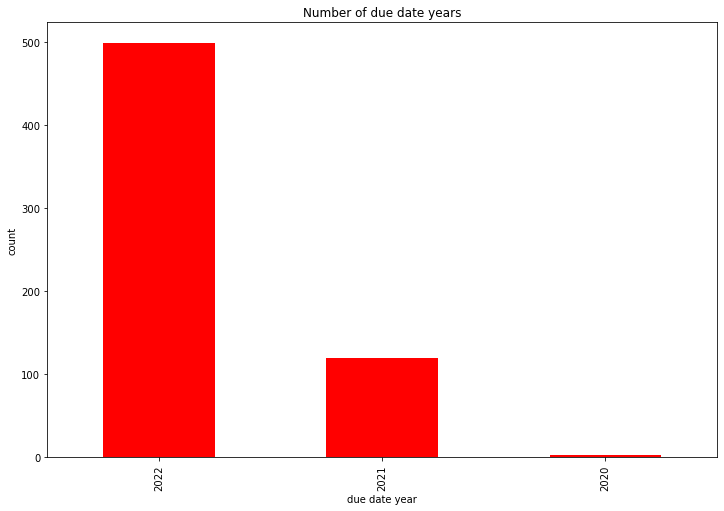

In [67]:
d_years = df_cleaned['dd_year'].sort_values().value_counts()
d_years.plot(kind="bar",color='r',title="Number of due date years", figsize=(12,8))
plt.xlabel('due date year')
plt.ylabel('count')

Text(0, 0.5, 'count')

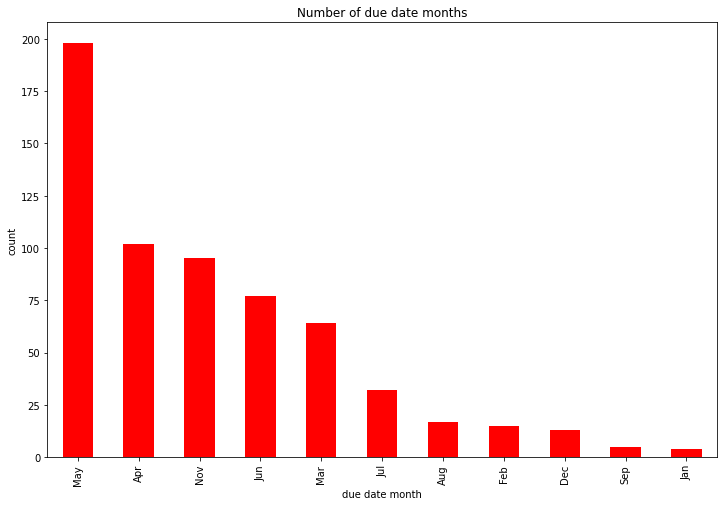

In [68]:
d_mon = df_cleaned['due_date_month'].sort_values().value_counts()
d_mon.plot(kind="bar",color='r',title="Number of due date months", figsize=(12,8))
plt.xlabel('due date month')
plt.ylabel('count')

Text(0, 0.5, 'count')

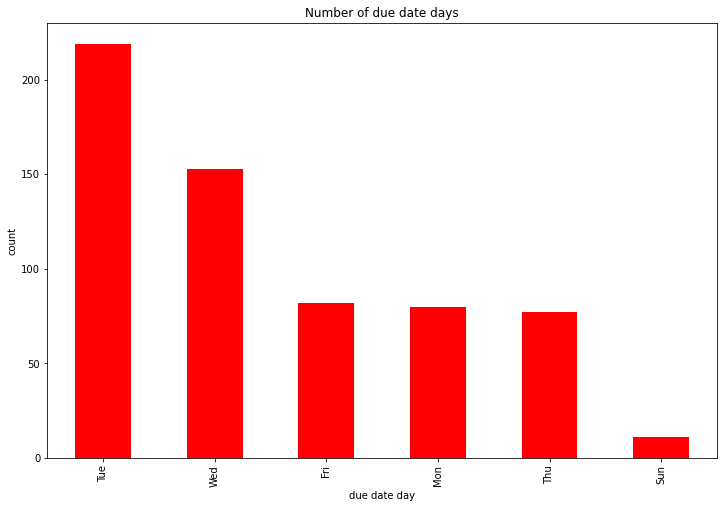

In [69]:
d_day = df_cleaned['due_date_dayofweek'].sort_values().value_counts()
d_day.plot(kind="bar",color='r',title="Number of due date days", figsize=(12,8))
plt.xlabel('due date day')
plt.ylabel('count')

Text(0, 0.5, 'count')

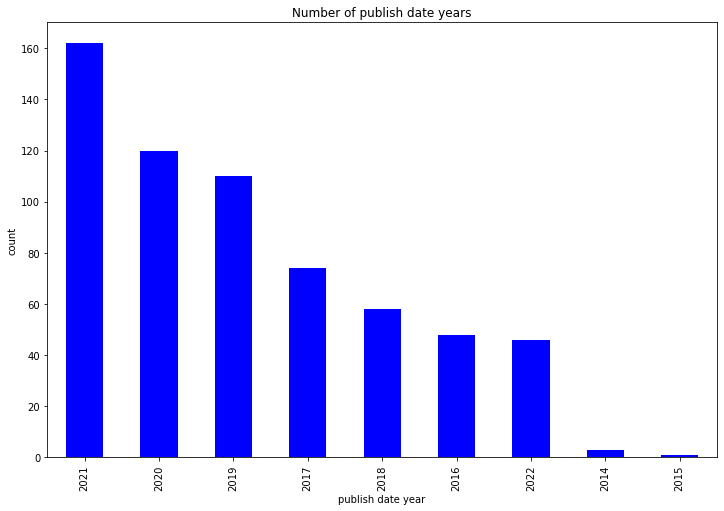

In [70]:
p_year = df_cleaned['pd_year'].sort_values().value_counts()
p_year.plot(kind="bar",color='b',title="Number of publish date years", figsize=(12,8))
plt.xlabel('publish date year')
plt.ylabel('count')

Text(0, 0.5, 'count')

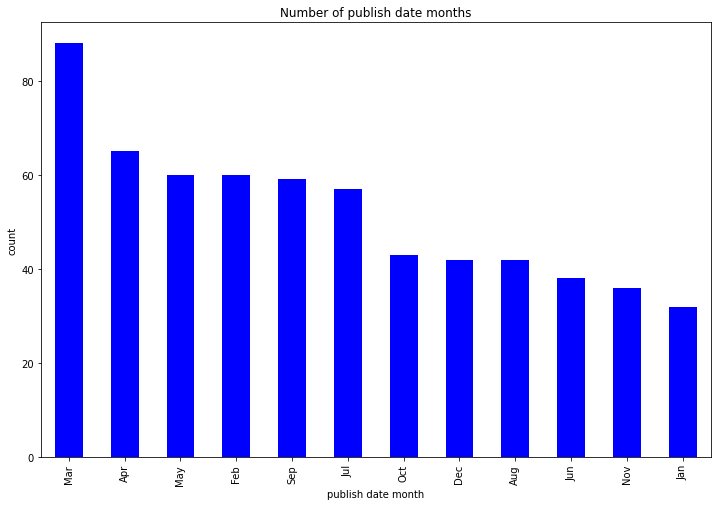

In [71]:
p_day = df_cleaned['pub_date_month'].sort_values().value_counts()
p_day.plot(kind="bar",color='b',title="Number of publish date months", figsize=(12,8))
plt.xlabel('publish date month')
plt.ylabel('count')

Text(0, 0.5, 'count')

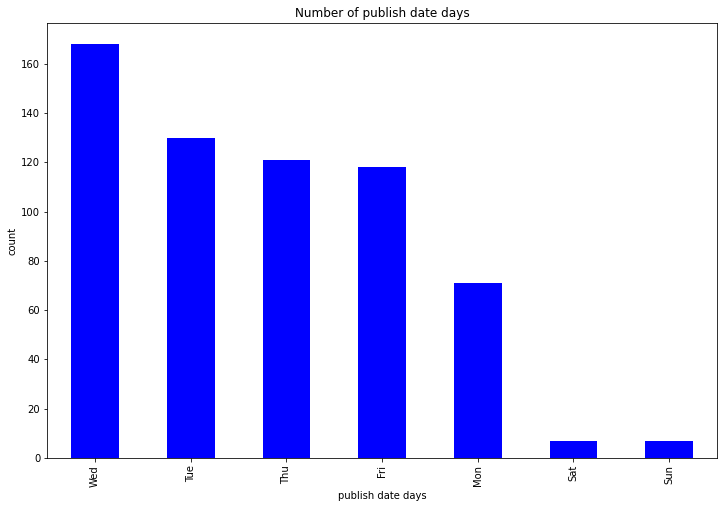

In [72]:
p_day = df_cleaned['pub_date_dayofweek'].sort_values().value_counts()
p_day.plot(kind="bar",color='b',title="Number of publish date days", figsize=(12,8))
plt.xlabel('publish date days')
plt.ylabel('count')

Text(0, 0.5, 'count')

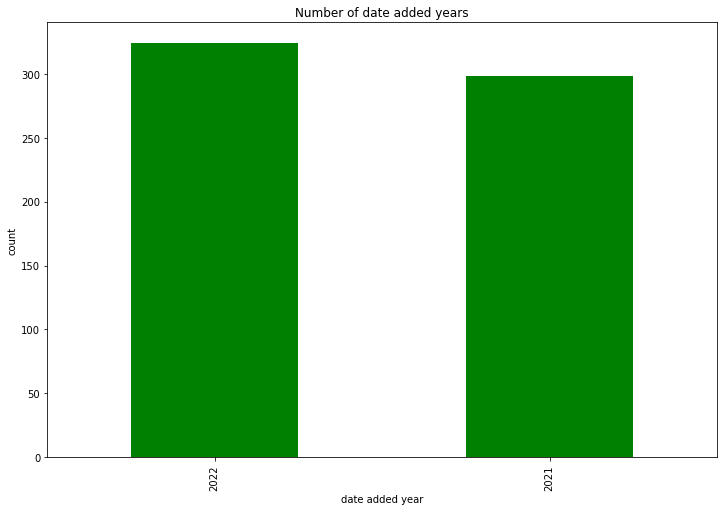

In [73]:
p_year = df_cleaned['da_year'].sort_values().value_counts()
p_year.plot(kind="bar",color='g',title="Number of date added years", figsize=(12,8))
plt.xlabel('date added year')
plt.ylabel('count')

Text(0, 0.5, 'count')

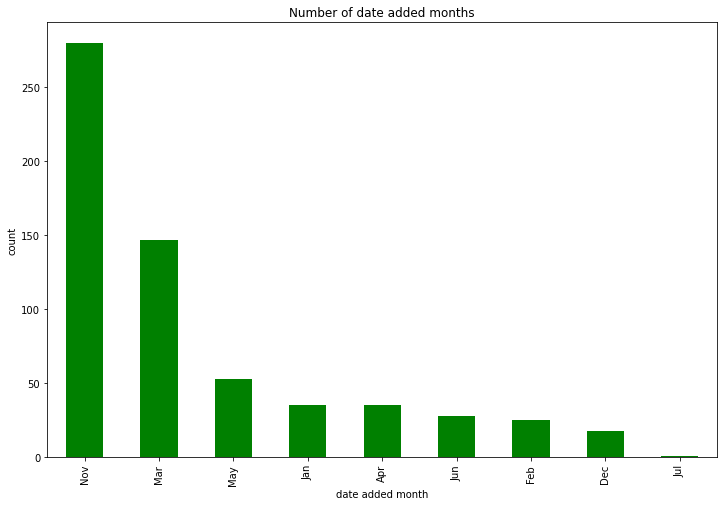

In [74]:
p_day = df_cleaned['date_added_month'].sort_values().value_counts()
p_day.plot(kind="bar",color='g',title="Number of date added months", figsize=(12,8))
plt.xlabel('date added month')
plt.ylabel('count')

Text(0, 0.5, 'count')

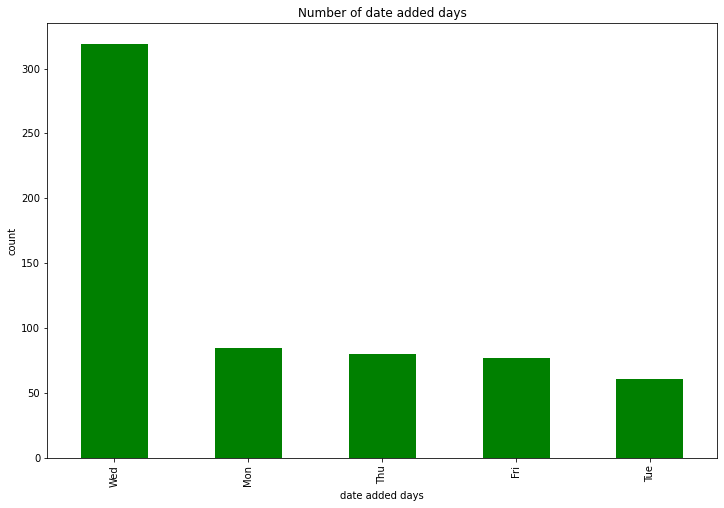

In [75]:
p_day = df_cleaned['date_added_dayofweek'].sort_values().value_counts()
p_day.plot(kind="bar",color='g',title="Number of date added days", figsize=(12,8))
plt.xlabel('date added days')
plt.ylabel('count')

In [48]:
#converting categorical columns into numberical
severity_mapping = {'CRITICAL': 4, 'HIGH': 3, 'MEDIUM': 2, 'LOW': 1}
complexity_mapping = {'HIGH': 2, 'LOW': 1}

df_cleaned['severity'] = df_cleaned['severity'].map(severity_mapping)
df_cleaned['complexity'] = df_cleaned['complexity'].map(complexity_mapping)

<ipython-input-48-53108338bbbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['severity'] = df_cleaned['severity'].map(severity_mapping)
<ipython-input-48-53108338bbbb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['complexity'] = df_cleaned['complexity'].map(complexity_mapping)


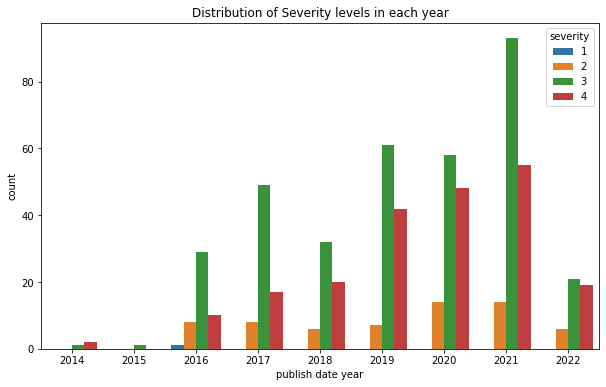

In [49]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',hue='severity',data=df_cleaned)
plt.title("Distribution of Severity levels in each year")
plt.xlabel('publish date year')
plt.show()

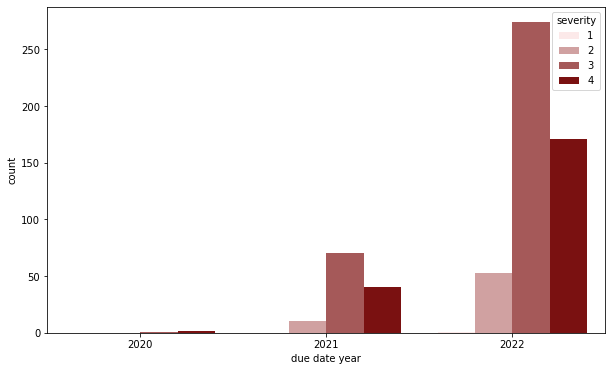

In [50]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',color = 'darkred',hue='severity',data=df_cleaned)
plt.xlabel('due date year')
plt.show()

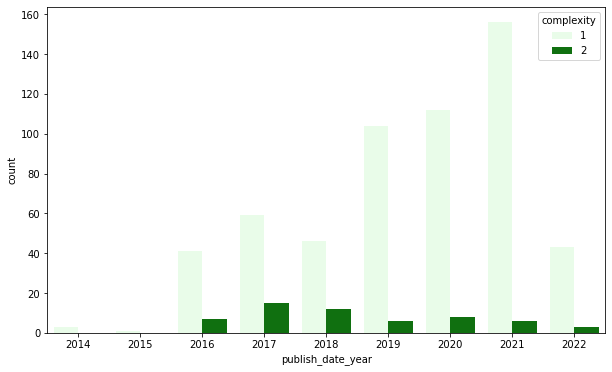

In [51]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',color='green',hue='complexity',data=df_cleaned)
plt.xlabel('publish_date_year')
plt.show()

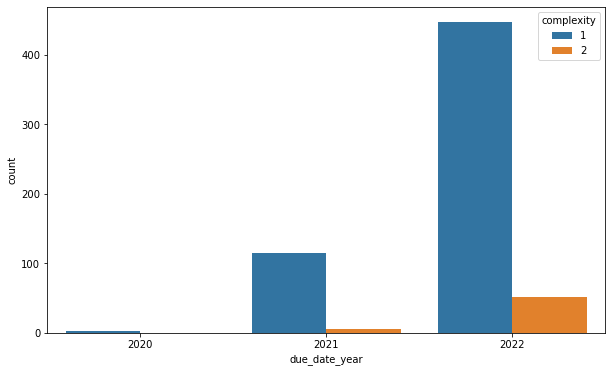

In [52]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',hue='complexity',data=df_cleaned)
plt.xlabel('due_date_year')
plt.show()

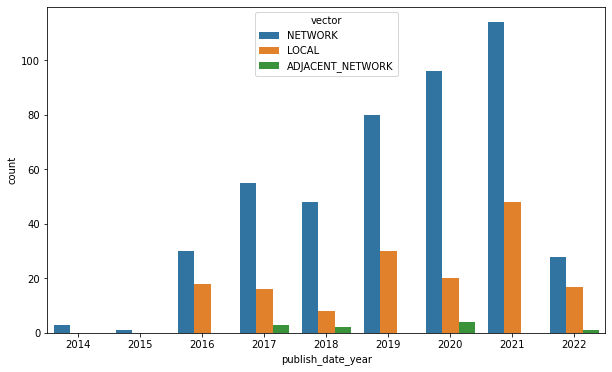

In [53]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',hue='vector',data=df_cleaned)
plt.xlabel('publish_date_year')
plt.show()

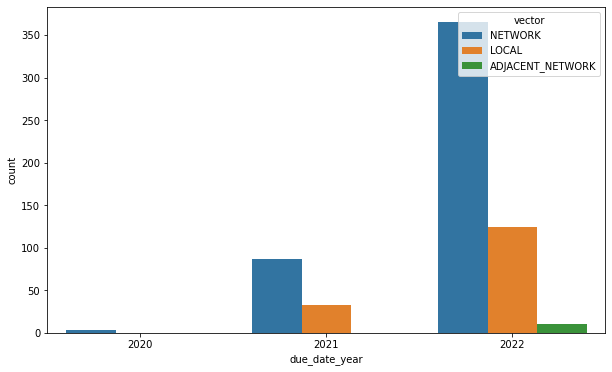

In [54]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',hue='vector',data=df_cleaned)
plt.xlabel('due_date_year')
plt.show()

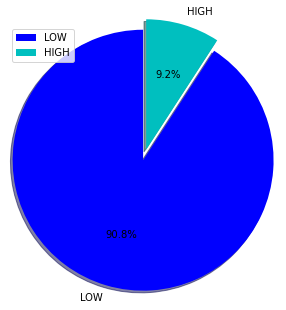

In [55]:
x=df_cleaned['complexity'].value_counts()
plt.figure(figsize=(5,5))
label = ['LOW','HIGH']
c=['b','c']
plt.pie(x, labels=label,colors=c,startangle=90,shadow=True,explode = (0,0.1),radius = 1.2,autopct='%.1f%%')
plt.legend()
plt.show()

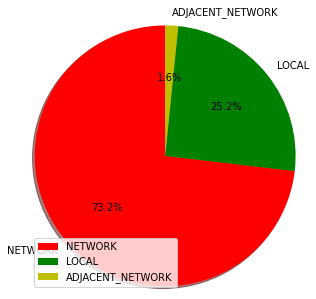

In [56]:
x=df_cleaned['vector'].value_counts()
plt.figure(figsize=(5,5))
label = ['NETWORK','LOCAL','ADJACENT_NETWORK']
c=['r','g','y']
plt.pie(x, labels=label,colors=c,startangle=90,shadow=True,radius = 1.2,autopct='%.1f%%')
plt.legend()
plt.show()

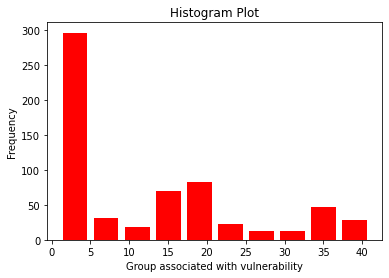

In [57]:
plt.hist(df_cleaned['grp'],color='red',rwidth=0.8)
plt.xlabel("Group associated with vulnerability")
plt.ylabel("Frequency")
plt.title("Histogram Plot")
plt.show()

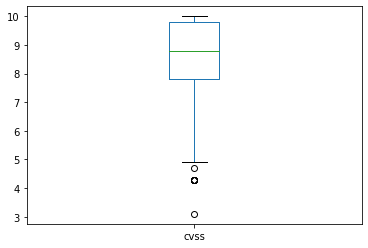

In [63]:
df_cleaned['cvss'].plot(kind='box')

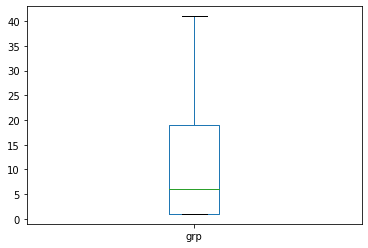

In [64]:
df_cleaned['grp'].plot(kind='box')

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [59]:
df_cleaned['vendor_project'] = label_encoder.fit_transform(df_cleaned['vendor_project'])
df_cleaned['product'] = label_encoder.fit_transform(df_cleaned['product'])
df_cleaned['cwe'] = label_encoder.fit_transform(df_cleaned['cwe'])
df_cleaned['vector'] = label_encoder.fit_transform(df_cleaned['vector'])

<ipython-input-59-f0a776b73a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['vendor_project'] = label_encoder.fit_transform(df_cleaned['vendor_project'])
<ipython-input-59-f0a776b73a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['product'] = label_encoder.fit_transform(df_cleaned['product'])
<ipython-input-59-f0a776b73a0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

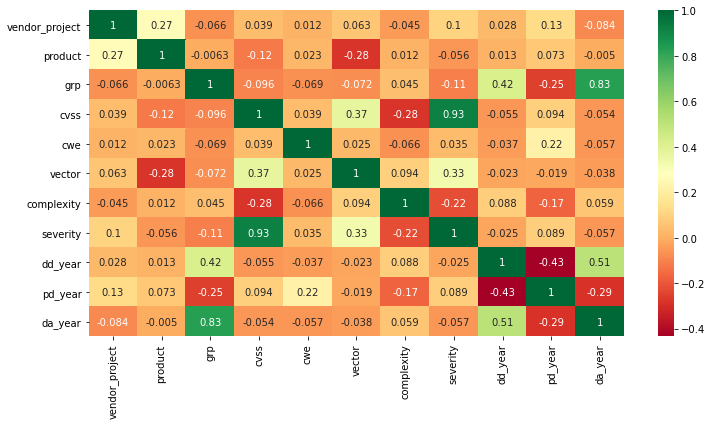

In [60]:
corr = df_cleaned.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="RdYlGn")